# Naive Bayes

In [1]:
import pandas as pd
import preprocessing as pp
import formatPredictions as fp
import metrics as m
import datasets as datasets
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Importacion Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Importacion preprocesamiento
from sklearn.model_selection import train_test_split

# Analisis de hiperparametros


### Random Hyperparameter Grid con todos los features

In [2]:
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering = pp.preprocessing_con_todos_los_features(dfTrain)
X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

In [3]:
alpha = [1, 1.5, 2, 2.5, 3, 3.5, 8.5, 10, 10.5]
fit_prior = [True, False]


In [4]:
# Creo la grilla de parametros
random_grid = {'alpha': alpha,
               'fit_prior': fit_prior}

In [5]:
pprint(random_grid)

{'alpha': [1, 1.5, 2, 2.5, 3, 3.5, 8.5, 10, 10.5], 'fit_prior': [True, False]}


In [6]:
# Creo el modelo
mnb = MultinomialNB()

In [7]:
mnb_random = RandomizedSearchCV(estimator = mnb, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state= pp.GetSeedForTrainSplit(), n_jobs = -1)

In [8]:
mnb_random.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    2.4s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': [1, 1.5, 2, 2.5, 3, 3.5, 8.5,
                                                  10, 10.5],
                                        'fit_prior': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=15, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [9]:
mnb_random.best_params_

{'alpha': 10, 'fit_prior': True}

### Random Hyperparameter Grid con seleccion

In [10]:
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering_con_seleccio = pp.feature_engineering_con_seleccion(dfTrain)
X = dfTrain_feature_engineering_con_seleccio.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering_con_seleccio.tiene_alto_valor_adquisitivo
X_train_seleccion, X_test_seleccion, y_train_seleccion, y_test_seleccion = train_test_split(X, y,  random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

In [11]:
alpha = [1, 1.5, 2, 2.5, 3, 3.5, 8.5, 10, 10.5]
fit_prior = [True, False]

In [12]:
# Creo la grilla de parametros
random_grid = {'alpha': alpha,
               'fit_prior': fit_prior}

In [13]:
pprint(random_grid)

{'alpha': [1, 1.5, 2, 2.5, 3, 3.5, 8.5, 10, 10.5], 'fit_prior': [True, False]}


In [14]:
# Creo el modelo
mnb = MultinomialNB()

In [15]:
mnb_random_seleccion = RandomizedSearchCV(estimator = mnb, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state= pp.GetSeedForTrainSplit(), n_jobs = -1)

In [16]:
mnb_random_seleccion.fit(X_train_seleccion, y_train_seleccion)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.7s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': [1, 1.5, 2, 2.5, 3, 3.5, 8.5,
                                                  10, 10.5],
                                        'fit_prior': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=15, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [17]:
mnb_random_seleccion.best_params_

{'alpha': 1, 'fit_prior': True}

# Entrenamiento aplicando Multinomial

# Entrenamiento con todos los features

In [18]:
mnb_con_todos_los_features = MultinomialNB( fit_prior= True, alpha=10)
mnb_con_todos_los_features.fit(X_train, y_train)
y_pred = mnb_con_todos_los_features.predict(X_test)

In [19]:
X_test.info

<bound method DataFrame.info of        anios_estudiados  edad  ...  trabajo_transporte  trabajo_ventas
10125                13    47  ...                   0               0
11478                 6    73  ...                   0               0
4224                 14    18  ...                   0               0
6592                 13    66  ...                   0               1
21910                12    39  ...                   0               0
...                 ...   ...  ...                 ...             ...
11239                13    35  ...                   0               0
27630                13    33  ...                   0               0
21899                14    67  ...                   0               0
2542                 14    25  ...                   0               1
30780                13    29  ...                   0               1

[6513 rows x 42 columns]>

# Metricas

Accuracy: 0.7851988331030247

Precision: 0.5400479616306955

Recall: 0.8061451384677583

F1 Score: 0.6168173103259381

Matriz de confusion: 
[[3988  959]
 [ 440 1126]]

AUC-ROC: 



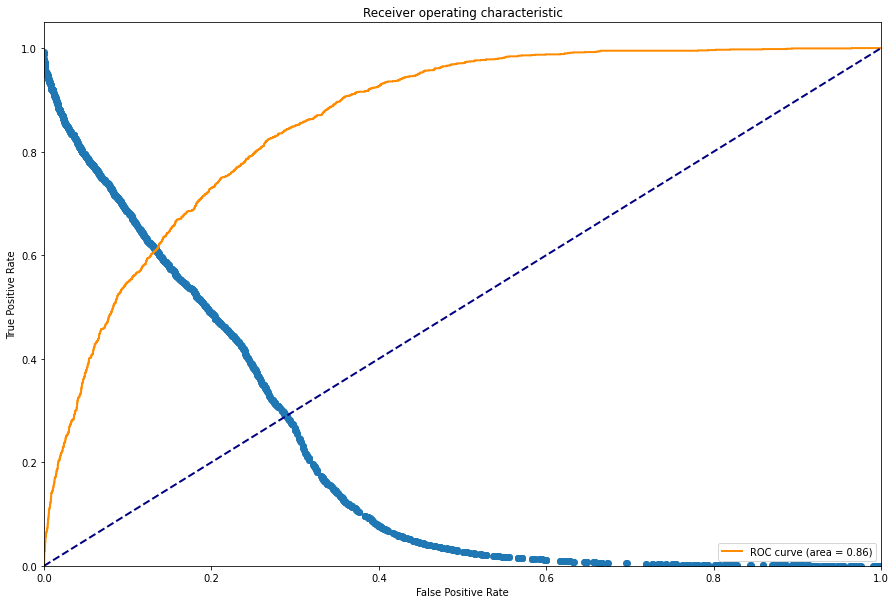

0.8594790604158874

In [20]:
m.getMetrics(y_test, y_pred, mnb_con_todos_los_features.predict_proba(X_test)[:,1])

# Entrenamiento con seleccion

In [21]:
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering = pp.feature_engineering_con_seleccion(dfTrain)
X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

In [22]:
mnb_con_seleccion = MultinomialNB(fit_prior= True, alpha=1)
mnb_con_seleccion.fit(X_train, y_train)
y_pred = mnb_con_seleccion.predict(X_test)

# Metricas

Accuracy: 0.806540764624597

Precision: 0.6830143540669856

Recall: 0.9464321811198706

F1 Score: 0.47543713572023316

Matriz de confusion: 
[[4682  265]
 [ 995  571]]

AUC-ROC: 



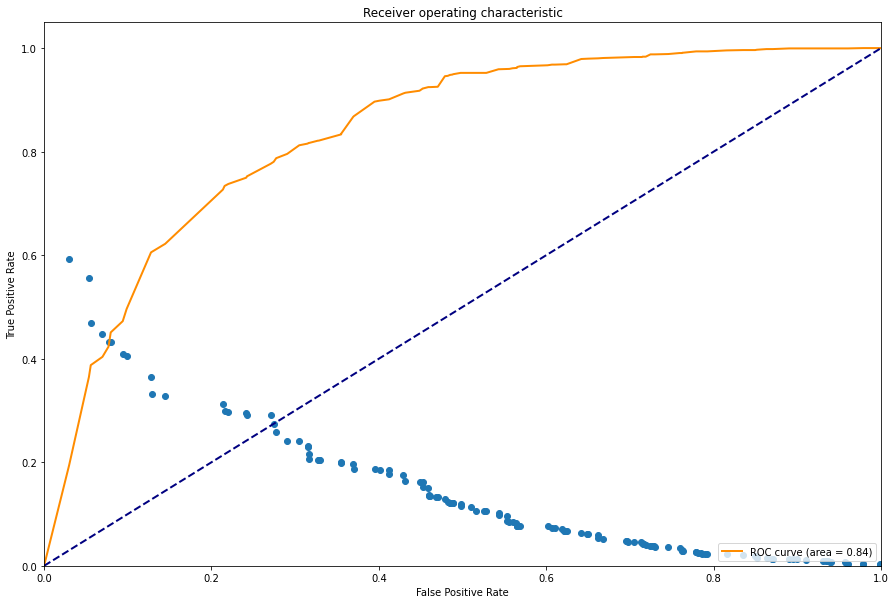

0.8368801247243773

In [23]:
m.getMetrics(y_test, y_pred, mnb_con_seleccion.predict_proba(X_test)[:,1])

# Prediccion

In [24]:
# Obtengo el set para predecir
dfObjetivo = datasets.getDataHoldout()

# Elimino columnas "representatividad_poblacional" y "id"
dfObjetivo.drop(columns = ['representatividad_poblacional', 'id'], inplace = True)

# Aplico feature engineering
dfObjetivo_feature_engineering = pp.preprocessing_con_todos_los_features(dfObjetivo)


In [25]:
dfObjetivo_feature_engineering.info

<bound method DataFrame.info of        anios_estudiados  edad  ...  trabajo_transporte  trabajo_ventas
0                    11    25  ...                   0               0
1                    13    38  ...                   0               0
2                    16    28  ...                   0               0
3                    14    44  ...                   0               0
4                    14    18  ...                   0               0
...                 ...   ...  ...                 ...             ...
16276                17    39  ...                   0               0
16277                13    64  ...                   0               0
16278                17    38  ...                   0               0
16279                17    44  ...                   0               0
16280                17    35  ...                   0               0

[16281 rows x 42 columns]>

In [26]:
predicciones = mnb_con_todos_los_features.predict(dfObjetivo_feature_engineering)
predicciones

array([0, 0, 1, ..., 1, 0, 1])

In [27]:
fp.exportPredictions(fp.formatPredictions(predicciones), "Naive Bayes")